### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐/특성 : 무게
- 라벨/타겟 : 길이
- 학습방법 : 지도학습+예측 =>> KNN기반의 회귀
- 학습/테스트 데이터  7: 3으로 준비

In [416]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np


In [417]:
data_file = '../data/fish.csv'

In [418]:
# 데이터 준비
fishDF = pd.read_csv(data_file, usecols=[0,1,2])
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [419]:
# 학습에 사용할 데이터 추출 => Perch 행만 추출
perchDF = fishDF[fishDF.Species == 'Perch']

# 인덱스 정리
perchDF.reset_index(drop=True, inplace=True)

In [420]:
# 추출된 데이터 기본 정보 확인
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [421]:
perchDF

,Species,Weight,Length
0,Perch,5.9,8.4
1,Perch,32.0,13.7
2,Perch,40.0,15.0
3,Perch,51.5,16.2
4,Perch,70.0,17.4
5,Perch,100.0,18.0
6,Perch,78.0,18.7
7,Perch,80.0,19.0
8,Perch,85.0,19.6
9,Perch,85.0,20.0


(3) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값

(3-1) 데이터 분포

In [422]:
# 무게와 길이에 대한 상관계수
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


(4) 학습 진행 <hr>
- 학습 방법 : 지도학습 + 회귀(예측) => 이웃회귀 KNeighborsRegressor

In [423]:
# 모듈로딩(7:3을 위한)
from sklearn.model_selection import train_test_split

In [424]:
x_train, x_test, y_train, y_test = train_test_split(perchDF[['Weight']], perchDF['Length'],random_state=0 ,test_size=0.3)

In [425]:
# 모델 인스턴스 생성 : KnnRegression
from sklearn.neighbors import KNeighborsRegressor
# model = KNeighborsRegressor(n_neighbors=7)

In [426]:
# print(fishDF[['Weight']])

In [427]:
# 학습
# model.fit(x_train, y_train)

(5) 테스트 <hr>

In [428]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
max_k = x_train.shape[0]
max_k

39

In [429]:
train_scoreList = []
test_scoreList = []
r2_scorelist = []

for k in range(1,max_k+1):
 model = KNeighborsRegressor(n_neighbors=k)
 model.fit(x_train, y_train)
 
 y_pre = model.predict(x_test)
 y_pre = np.round(y_pre, 1)
 
 r2_scorelist.append(r2_score(y_test, y_pre))
 train_scoreList.append(model.score(x_train, y_train))
 test_scoreList.append(model.score(x_test, y_test))


In [444]:
r2_scorelist

[0.9674564850132328,
 0.9606731961081785,
 0.9509915003996152,
 0.9755618542146245,
 0.9784195816243999,
 0.9826705782695464,
 0.9790704519241353,
 0.9731516001359171,
 0.9650055515407918,
 0.9554764035587291,
 0.9387876822795775,
 0.9416047302956195,
 0.9349943288139325,
 0.923827835234098,
 0.9057153351742753,
 0.8927080990280019,
 0.878663538341525,
 0.8663173423434201,
 0.8350450584108238,
 0.8041795684155615,
 0.7737818914482342,
 0.750187843082828,
 0.7177053471866611,
 0.6718088212068859,
 0.6250783676555748,
 0.5640287675100861,
 0.5374651234021374,
 0.5284851472354761,
 0.5011587644950252,
 0.47522565098994507,
 0.4449703519006848,
 0.39667374169063563,
 0.35461124857023896,
 0.3187727026910616,
 0.2667437581059673,
 0.21119604596292885,
 0.14678022598599705,
 0.07803205057645068,
 -0.006977712478045239]

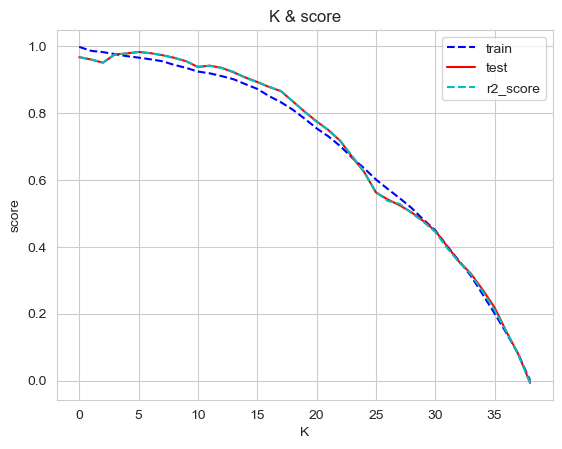

In [443]:
plt.plot(train_scoreList, 'b--',label='train')
plt.plot(test_scoreList, 'r-',label='test')
plt.plot(r2_scorelist, color='c', linestyle='--', label='r2_score')
plt.title('K & score')
plt.xlabel('K')
plt.ylabel('score')
plt.legend()
plt.show()

In [431]:
test_scoreList.index(max(test_scoreList))   # k =6  일떄 최대

5

k = 6 일때로 다시 모델 만들기

In [446]:
model6 = KNeighborsRegressor(n_neighbors=6)

In [447]:
# 모델 학습
model6.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=6)

(5-re) 훈련용 데이터를 넣어 검사진행
- 제대로 만들어진 모델이지 확인하는 과정
    * 훈련용 데이터에 대한 정수
    * 테스트용 데이터에 대한 점수
    * 훈련점수와 테스트 점수 비교
          - 훈련점수 > 테스트점수 : 과대적합(Overfitting)
          - 훈련점수 와 테스트점수 비슷 : 최적적합
          - 훈련점수 낮고, 테스트점수 낮다 : 과소적합(Underfitting)   

In [451]:
print(model6.score(x_train, y_train), model6.score(x_test,y_test))

0.9660832250379034 0.9830536425605365


In [448]:
 # score 메서드는 결정계수 R2 즉, 얼마나 정답에 가깝게 근사하게 결과를 예측해내는지를 나태는계계수값을 준다
 # 범위 : 0.0 ~1.0
 # 1.0에 가까울수록 잘 만들어진 모델
 model6.score(x_test, y_test)

0.9830536425605365

In [455]:
# 예측값
y6_pre = model6.predict(x_test)
y6_pre= np.round(y6_pre, 1)
y6_pre

array([37.1, 27. , 37.1, 24.2, 21.2, 15.9, 27. , 37.1, 38.3, 27. , 18.6,
       21.2, 24.2, 22.4, 27. , 42.6, 32.4])

(6) 성능평가 <hr>
- 결정계수 값 : 1.0에 가까울수록 좋음
- 오차평균 값 : 낮을수록 좋음
- 활용 모듈 : sklearn.metrics

In [454]:
# # 결정 계수 값
r2 = r2_score(y_test, y6_pre)

# 평균절대값오차
mae=mean_absolute_error(y_test, y6_pre)

# 평균제곱오차 : 
mse = mean_squared_error(y_test, y6_pre)

# 평균제곱오차제곱근 : RMSE => 1.4버전에 추가
rmse = mean_squared_error(y_test, y6_pre, squared=False)

print(f'[모델설명도]\nR2: {r2}')
print(f'[에러]\nMAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

[모델설명도]
R2: 0.9826705782695464
[에러]
MAE: 0.7647058823529419
MSE: 1.002352941176472
RMSE: 1.0011757793596847
